# Data processing graduation_train

In [139]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from classifier_test_framework import ClassifierTestFramework
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("graduation_train.csv")


num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print(num_cols)
print(cat_cols)

print(len(num_cols) + len(cat_cols))
for colum in df.columns:
    df = df[df[colum] != ""]
    if len(df[df[colum] < 0]) > 0:
        print("negative value")

print(df)

df["curricular_units_1st_sem_grade_rounded"] = df["curricular_units_1st_sem_grade"].round(0)
df["curricular_units_2nd_sem_grade_rounded"] = df["curricular_units_2nd_sem_grade"].round(0)

df["passing_grade_1st_sem"] = df["curricular_units_1st_sem_grade_rounded"] >= 10
df["passing_grade_2nd_sem"] = df["curricular_units_2nd_sem_grade_rounded"] >= 10
df["passed_both_semesters"] = df["passing_grade_1st_sem"] & df["passing_grade_2nd_sem"]

Index(['student_id', 'marital_status', 'application_mode', 'application_order',
       'course', 'attendance_type', 'previous_qualification', 'nationality',
       'mother_qualification', 'father_qualification', 'mother_occupation',
       'father_occupation', 'displaced', 'special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate',
       'inflation_rate', 'gdp',

First we remove all empty items and split up the scores into 20 distinct classes.
And add 2 new columns to define wether they had a passing grade in the first or second semester

## Pass information and gender

[0.30387029288702927, 0.6961297071129707, 0.5604838709677419, 0.43951612903225806]
Percentage of target = 1: 60.85%
Total count sum (proporties): 2.00, total rows: 2904


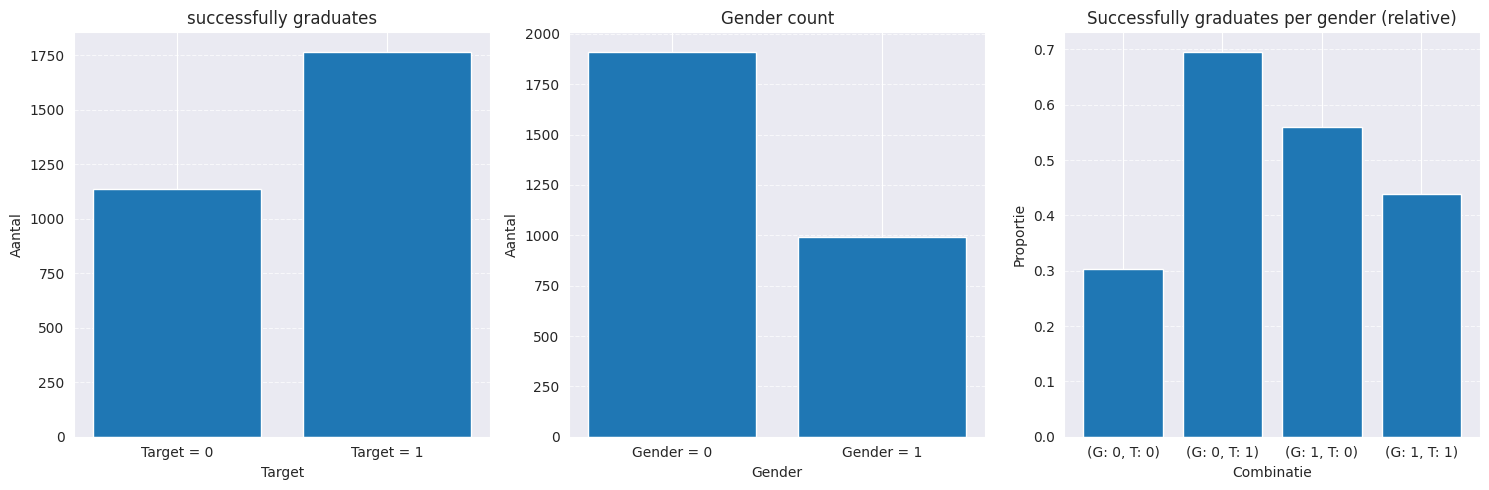

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First subplot: target counts
data_target = [len(df[df["target"] == 0]), len(df[df["target"] == 1])]
labels_target = ['Target = 0', 'Target = 1']

axes[0].bar(labels_target, data_target)
axes[0].set_title('successfully graduates')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Aantal')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Second subplot: gender counts
data_gender = [len(df[df["gender"] == 0]), len(df[df["gender"] == 1])]
labels_gender = ['Gender = 0', 'Gender = 1']

axes[1].bar(labels_gender, data_gender)
axes[1].set_title('Gender count')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Aantal')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Third subplot: target by gender proportion
data_combined = [
    len(df[(df["target"] == 0) & (df["gender"] == 0)]) / len(df[df["gender"] == 0]),
    len(df[(df["target"] == 1) & (df["gender"] == 0)]) / len(df[df["gender"] == 0]),
    len(df[(df["target"] == 0) & (df["gender"] == 1)]) / len(df[df["gender"] == 1]),
    len(df[(df["target"] == 1) & (df["gender"] == 1)]) / len(df[df["gender"] == 1]),
]
labels_combined = ['(G: 0, T: 0)', '(G: 0, T: 1)', '(G: 1, T: 0)', '(G: 1, T: 1)']

axes[2].bar(labels_combined, data_combined)
axes[2].set_title('Successfully graduates per gender (relative)')
axes[2].set_xlabel('Combinatie')
axes[2].set_ylabel('Proportie')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("images/target_counts.png")

print(data_combined)
# Print some stats
print(f"Percentage of target = 1: {len(df[df['target'] == 1]) / len(df) * 100:.2f}%")
print(f"Total count sum (proporties): {sum(data_combined):.2f}, total rows: {len(df)}")

## Data processing graduation_test

In [141]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from classifier_test_framework import ClassifierTestFramework
import pandas as pd
import numpy as np
import seaborn as sns

graduation_test_df = pd.read_csv("graduation_test.csv")

# print(df.isnull().sum())

num_cols = graduation_test_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = graduation_test_df.select_dtypes(include=["object"]).columns

print(num_cols)
print(cat_cols)

for colum in graduation_test_df.columns:
    graduation_test_df = graduation_test_df[graduation_test_df[colum] != ""]
    if len(graduation_test_df[graduation_test_df[colum] < 0]) > 0:
        print("negative value")

print(graduation_test_df)

graduation_test_df["curricular_units_1st_sem_grade_rounded"] = graduation_test_df["curricular_units_1st_sem_grade"].round(0)
graduation_test_df["curricular_units_2nd_sem_grade_rounded"] = graduation_test_df["curricular_units_2nd_sem_grade"].round(0)

graduation_test_df["passing_grade_1st_sem"] = graduation_test_df["curricular_units_1st_sem_grade_rounded"] >= 10
graduation_test_df["passing_grade_2nd_sem"] = graduation_test_df["curricular_units_2nd_sem_grade_rounded"] >= 10
graduation_test_df["passed_both_semesters"] = graduation_test_df["passing_grade_1st_sem"] & graduation_test_df["passing_grade_2nd_sem"]

Index(['student_id', 'marital_status', 'application_mode', 'application_order',
       'course', 'attendance_type', 'previous_qualification', 'nationality',
       'mother_qualification', 'father_qualification', 'mother_occupation',
       'father_occupation', 'displaced', 'special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate',
       'inflation_rate', 'gdp']

## gender info

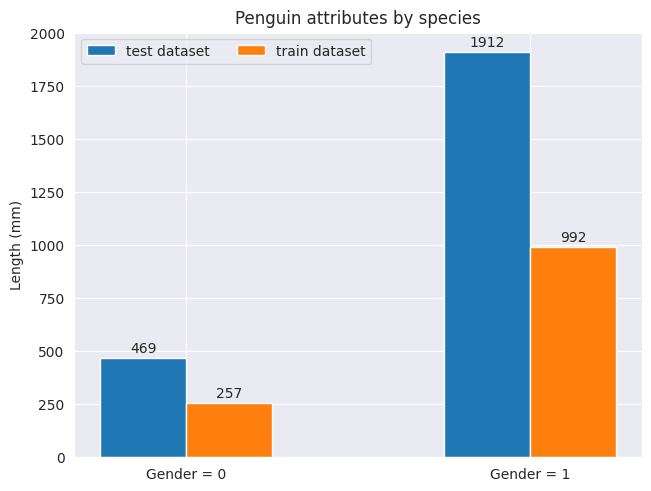

			 Gender:0 	 Gender:1
Train dataset gender in: 0.6584022038567493	0.3415977961432507
Test dataset gender in: 0.6460055096418733	0.35399449035812675


In [142]:

data = {
    "test dataset": [len(graduation_test_df[graduation_test_df["gender"] == 0]), len(df[df["gender"] == 0])],
    "train dataset": [len(graduation_test_df[graduation_test_df["gender"] == 1]), len(df[df["gender"] == 1])],
}

labels = ['Gender = 0', 'Gender = 1']

fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(labels))  # the label locations

width = 0.25  # the width of the bars
multiplier = 0.5
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_xticks(x + width, labels)

ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=2)

plt.show()

print("\t\t\t Gender:0 \t Gender:1")
print(f"Train dataset gender in: " + str(len(df[df["gender"] == 0])/len(df)) + "\t" +  str(len(df[df["gender"] == 1])/len(df)))
print(f"Test dataset gender in: " + str(len(graduation_test_df[graduation_test_df["gender"] == 0])/len(graduation_test_df)) + "\t" +  str(len(graduation_test_df[graduation_test_df["gender"] == 1])/len(graduation_test_df)))



# Feature selection

In [143]:
colum_combinations = {
    "academic_performance_indicators": [
        'curricular_units_1st_sem_credited',
        'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations',
        'curricular_units_1st_sem_approved',
        'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited',
        'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations',
        'curricular_units_2nd_sem_approved',
        'curricular_units_2nd_sem_without_evaluations',
        'curricular_units_1st_sem_grade_rounded', 'curricular_units_2nd_sem_grade_rounded',
        'passing_grade_1st_sem', 'passing_grade_2nd_sem'
    ],
    "person_and_economic_indicator": [
        'marital_status', 'application_mode', 'application_order', 'course', 'attendance_type',
        'previous_qualification', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation',
        'father_occupation', 'displaced', 'special_needs', 'debtor', 'tuition_fees_up_to_date',
        'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited',
        'unemployment_rate', 'inflation_rate', 'gdp'
    ],
    "person_and_economic_and_academic_performance_indicators": [
        'marital_status', 'application_mode', 'application_order', 'course', 'attendance_type',
        'previous_qualification', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation',
        'father_occupation', 'displaced', 'special_needs', 'debtor', 'tuition_fees_up_to_date',
        'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited',
        'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations',
        'curricular_units_1st_sem_approved',
        'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited',
        'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations',
        'curricular_units_2nd_sem_approved',
        'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate', 'inflation_rate', 'gdp',
        'curricular_units_1st_sem_grade_rounded', 'curricular_units_2nd_sem_grade_rounded',
        'passing_grade_1st_sem', 'passing_grade_2nd_sem', "gender"]
}

In [144]:
def select_kbest(X_train_full, y_train_full, k=10, score_function=f_classif):
    """
    Return an order list (importance) of top k features
    :param X_train_full: Train set with all features
    :param y_train_full: Target values
    :param k: number of features
    :param score_function: score_function
    :return:
    """
    if score_function == chi2:
        scaler = MinMaxScaler()
        X_train_full = pd.DataFrame(scaler.fit_transform(X_train_full), columns=X_train_full.columns)

    selector = SelectKBest(score_func=score_function, k=k)
    selector.fit(X_train_full, y_train_full)
    scores = selector.scores_
    mask = selector.get_support()

    selected_scores = pd.DataFrame({
        'Feature': X_train_full.columns[mask],
        'Score': scores[mask]
    })
    selected_scores = selected_scores.sort_values(by='Score', ascending=False)

    return selected_scores['Feature'].tolist()

### Best performing features

In [145]:
for score_function in [chi2, f_classif]:
    for k in [5, 10, 15]:
        x = df[colum_combinations["person_and_economic_and_academic_performance_indicators"]]
        y = df[["target"]]
        b_best_features = select_kbest(x, y, k, score_function)
        print(f"K: {str(score_function.__name__)} {k} best features: {b_best_features}")

K: chi2 5 best features: ['passing_grade_2nd_sem', 'scholarship_holder', 'debtor', 'curricular_units_2nd_sem_grade_rounded', 'curricular_units_2nd_sem_approved']
K: chi2 10 best features: ['passing_grade_2nd_sem', 'scholarship_holder', 'debtor', 'curricular_units_2nd_sem_grade_rounded', 'curricular_units_2nd_sem_approved', 'gender', 'passing_grade_1st_sem', 'curricular_units_1st_sem_grade_rounded', 'tuition_fees_up_to_date', 'curricular_units_1st_sem_approved']
K: chi2 15 best features: ['passing_grade_2nd_sem', 'scholarship_holder', 'debtor', 'curricular_units_2nd_sem_grade_rounded', 'curricular_units_2nd_sem_approved', 'gender', 'passing_grade_1st_sem', 'curricular_units_1st_sem_grade_rounded', 'tuition_fees_up_to_date', 'curricular_units_1st_sem_approved', 'application_mode', 'age_at_enrollment', 'displaced', 'previous_qualification', 'marital_status']
K: f_classif 5 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem

/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Splitting dataset


In [146]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Creating and comparing models

The feature combinations we will be using

In [195]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, \
    confusion_matrix

classifiers_results = {}

def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

def report_results(train_df, columns_name, columns, classifier_name, classifier, param_grid, standard_scaler=True, minmax_scaler=False):
    """
    Train on give clasifier on given data using kfold and saves best model and its parameters in classifiers_results
    :param train_df: train dataframe
    :param columns_name: name of columns to use in report name
    :param columns: list of columns to use in train data
    :param classifier_name: name of classifier to use in report name
    :param classifier: classifier to use
    :param param_grid: params grid to use in GridSearchCV
    :param standard_scaler: use of standard scaler on data
    :param minmax_scaler: use of minmax scaler on data
    :return: grid object
    """
    x = train_df[columns].values.tolist()

    if standard_scaler:
        scaler = StandardScaler()
        x = scaler.fit_transform(x)

    if minmax_scaler:
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)

    y = train_df["target"].values

    # Run GridSearchCV
    grid = GridSearchCV(classifier, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                        scoring='roc_auc', n_jobs=-1)
    grid.fit(x, y)
    best_model = grid.best_estimator_

    # Re-evaluate using StratifiedKFold on full train data
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies, aucs = [], []
    prec_0s, rec_0s = [], []
    prec_1s, rec_1s = [], []

    all_y_true = []
    all_y_pred = []

    for train_index, test_index in skf.split(x, y):
        X_train, X_val = x[train_index], x[test_index]
        y_train, y_val = y[train_index], y[test_index]

        model = best_model
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        accuracies.append(accuracy_score(y_val, y_pred))
        aucs.append(roc_auc_score(y_val, y_proba))

        cm = confusion_matrix(y_val, y_pred)
        tn, fp, fn, tp = cm.ravel()

        prec_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
        rec_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
        prec_1 = tp / (tp + fp) if (tp + fp) > 0 else 0
        rec_1 = tp / (tp + fn) if (tp + fn) > 0 else 0

        prec_0s.append(prec_0)
        rec_0s.append(rec_0)
        prec_1s.append(prec_1)
        rec_1s.append(rec_1)

    # Final metrics
    final_accuracy = np.mean(accuracies)
    final_auc = np.mean(aucs)
    final_precision_0 = np.mean(prec_0s)
    final_recall_0 = np.mean(rec_0s)
    final_precision_1 = np.mean(prec_1s)
    final_recall_1 = np.mean(rec_1s)
    report = classification_report(all_y_true, all_y_pred)

    classifiers_results[f"{classifier_name}_{columns_name}"] = {
        "auc": final_auc,
        "accuracy": final_accuracy,
        "precision_0": final_precision_0,
        "recall_0": final_recall_0,
        "precision_1": final_precision_1,
        "recall_1": final_recall_1,
        "report": report,
        "best_model": best_model,
        "best_params": grid.best_params_,
        "column_items": columns
    }

    return grid

def results_with_test_data(train_df, test_df, columns_name, columns, classifier_name, classifier, param_grid, standard_scaler=True, minmax_scaler=False):
    """
    Function to test a model on test data and saves best model and its parameters
    :param train_df: train dataframe
    :param test_df: test dataframe
    :param columns_name: name of columns to use in report name
    :param columns: list of columns to use in train data
    :param classifier_name: name of classifier to use in report name
    :param classifier: classifier to use
    :param param_grid: params grid to use in GridSearchCV
    :param standard_scaler: use of standard scaler on data
    :param minmax_scaler: use of minmax scaler on data
    :return: grid object
    """
    grid = GridSearchCV(classifier, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1)
    x = train_df[columns].values.tolist()

    if standard_scaler:
        scaler = StandardScaler()
        x_scaled_array = scaler.fit_transform(x)

        # Wrap it back into a DataFrame
        x_scaled_df = pd.DataFrame(x_scaled_array, columns=train_df[columns].columns, index=train_df[columns].index)

        x = x_scaled_df

    if minmax_scaler:
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
        x = pd.DataFrame(x, columns=train_df[columns].columns, index=train_df[columns].index)

    y = list(train_df["target"])

    grid.fit(x, y)

    best_model = grid.best_estimator_

    test_items = test_df[columns].values.tolist()

    scaler = StandardScaler()
    x_scaled_array = scaler.fit_transform(test_items)

    # Wrap it back into a DataFrame
    x_scaled_df = pd.DataFrame(x_scaled_array, columns=test_df[columns].columns,
                               index=test_df[columns].index)

    test_items = x_scaled_df

    predictions = best_model.predict(test_items)
    report = classification_report(test_df["target"], predictions)

    # 1. Accuracy
    accuracy = accuracy_score(test_df["target"], predictions)

    # 2. AUC
    auc = roc_auc_score(test_df["target"], predictions)

    # 3. Precision & Recall for both classes
    precision_0 = precision_score(test_df["target"], predictions, pos_label=0)
    recall_0 = recall_score(test_df["target"], predictions, pos_label=0)
    precision_1 = precision_score(test_df["target"], predictions, pos_label=1)
    recall_1 = recall_score(test_df["target"], predictions, pos_label=1)

    classifiers_results[f"{classifier_name}_{columns_name}"] = {"auc": auc, "accuracy": accuracy, "precision_0": precision_0, "recall_0": recall_0, "precision_1": precision_1, "recall_1": recall_1, "report": report, "best_model": best_model, "best_params": grid.best_params_, "column_items": columns}

    return grid



## Decision trees

Decision tree 37
{'max_depth': 20, 'min_samples_split': 100}


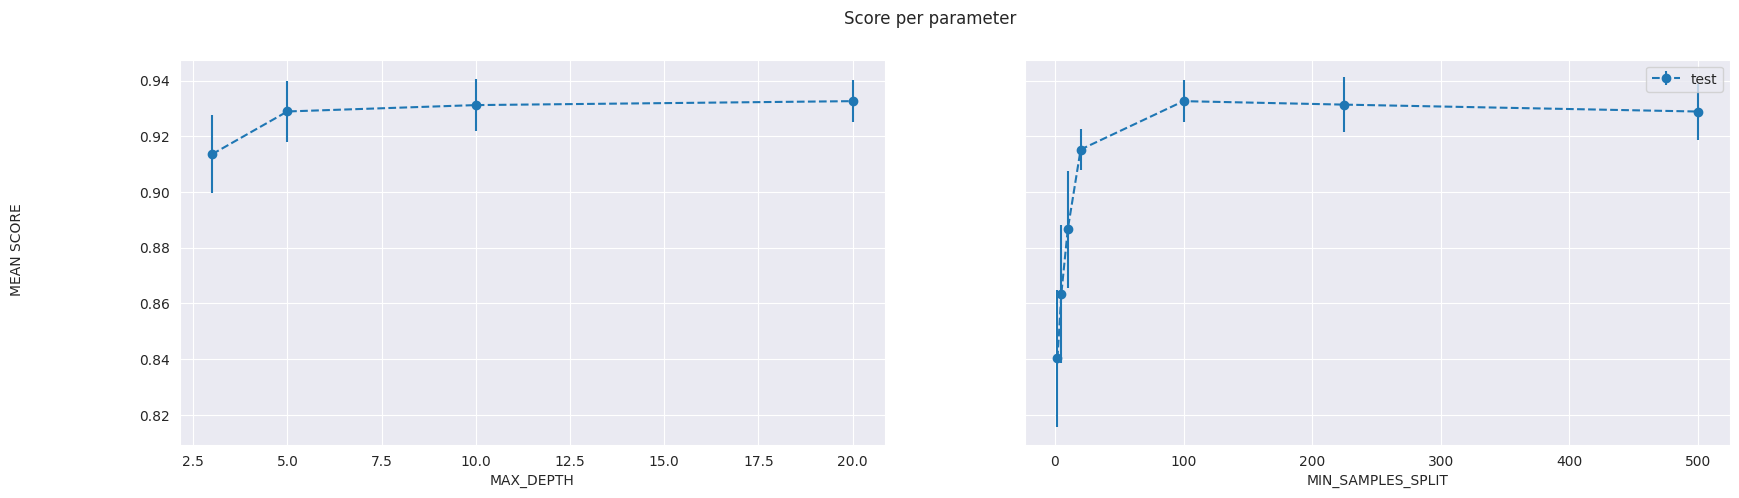

{'DecisionTree_': {'auc': 0.9326293186357223, 'accuracy': 0.889359473489062, 'precision_0': 0.8732242794676202, 'recall_0': 0.8440068899976241, 'precision_1': 0.901032762069757, 'recall_1': 0.9189015925897882, 'report': '              precision    recall  f1-score   support\n\n           0       0.87      0.84      0.86       917\n           1       0.90      0.92      0.91      1406\n\n    accuracy                           0.89      2323\n   macro avg       0.89      0.88      0.88      2323\nweighted avg       0.89      0.89      0.89      2323\n', 'best_model': DecisionTreeClassifier(max_depth=20, min_samples_split=100), 'best_params': {'max_depth': 20, 'min_samples_split': 100}, 'column_items': ['marital_status', 'application_mode', 'application_order', 'course', 'attendance_type', 'previous_qualification', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation', 'father_occupation', 'displaced', 'special_needs', 'debtor', 'tuition_fees_up_to_date', 'sch

'decision_tree.pdf'

In [148]:
import graphviz

classifiers_results = {}
grid_search = report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "DecisionTree", tree.DecisionTreeClassifier(), {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10, 20, 100, 225, 500]
    })
print("Decision tree", grid_search.best_estimator_.get_n_leaves())
print(grid_search.best_params_)
plot_search_results(grid_search)
print(classifiers_results)

dot_data = tree.export_graphviz(
    grid_search.best_estimator_,
    out_file=None,
    feature_names=classifiers_results["DecisionTree_"]["column_items"],
    class_names=["Passed", "Drop out"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as 'decision_tree.pdf'
graph.view()  # Opens the tree


## knn

Opening in existing browser session.
{'n_neighbors': 50, 'weights': 'distance'}


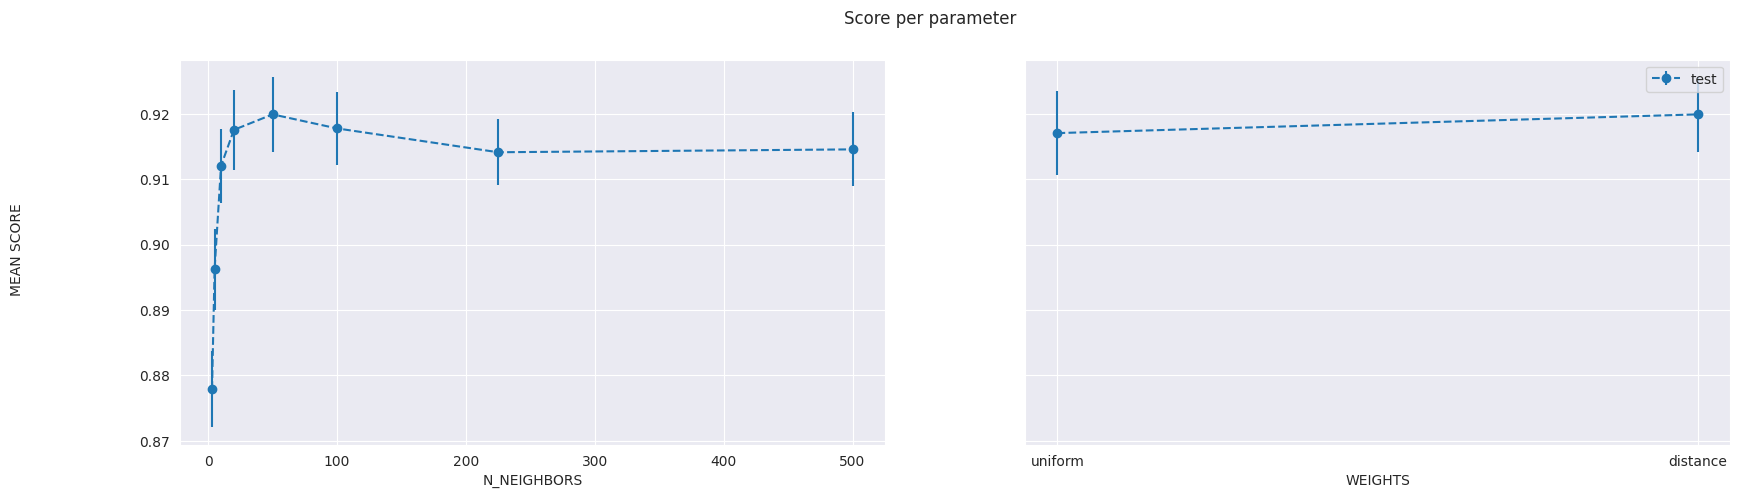

In [149]:

grid_search = report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"knn", KNeighborsClassifier(), {
    "n_neighbors": [3, 5, 10, 20, 50, 100, 225, 500],
    "weights": ["uniform", "distance"]
    })
print(grid_search.best_params_)
plot_search_results(grid_search)

## Naive bayes

In [150]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB

classifiers_results = {}
report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "GaussianNB", GaussianNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "var_smoothing": [1e-9]
    })

report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "BernoulliNB", BernoulliNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    })

report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "MultinomialNB", MultinomialNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    }, minmax_scaler=True)

report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "ComplementNB", ComplementNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    }, minmax_scaler=True)

pd.DataFrame(classifiers_results).T

,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
GaussianNB_,0.891918,0.837706,0.852962,0.713162,0.831291,0.918899,precision recall f1-score ...,GaussianNB(),{'var_smoothing': 1e-09},"[marital_status, application_mode, application..."
BernoulliNB_,0.915697,0.875581,0.88804,0.78404,0.869288,0.935264,precision recall f1-score ...,BernoulliNB(alpha=1),{'alpha': 1},"[marital_status, application_mode, application..."
MultinomialNB_,0.877379,0.819633,0.854258,0.654259,0.804639,0.92746,precision recall f1-score ...,MultinomialNB(alpha=1),{'alpha': 1},"[marital_status, application_mode, application..."
ComplementNB_,0.877379,0.822209,0.793798,0.742575,0.839148,0.874112,precision recall f1-score ...,ComplementNB(alpha=1),{'alpha': 1},"[marital_status, application_mode, application..."


## Ensemble methods
### RandomForestClassifier

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}


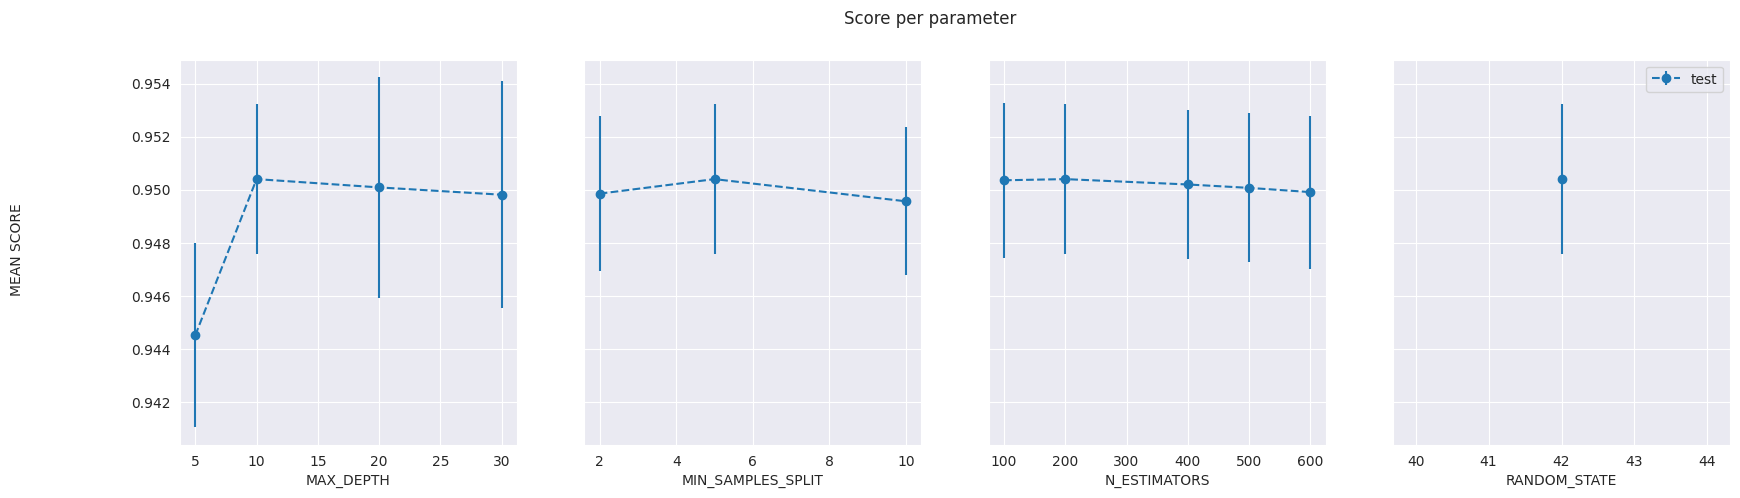

In [151]:

classifiers_results = {}
grid_search = report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"RandomForestClassifier", RandomForestClassifier(), {
    "n_estimators": [100, 200, 400, 500, 600],
    "max_depth": [5, 10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "random_state": [42]
    })
print(grid_search.best_params_)
plot_search_results(grid_search)

### AdaBoostClassifier

{'learning_rate': 0.1, 'n_estimators': 600, 'random_state': 42}


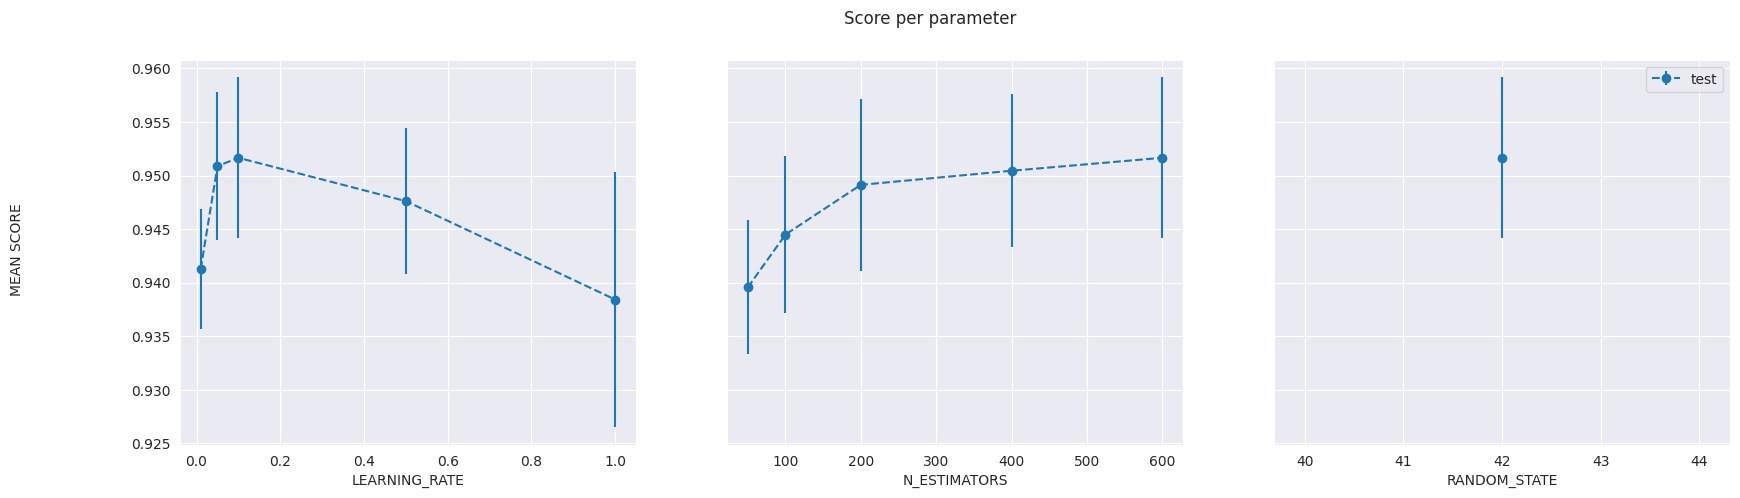

In [152]:
from sklearn.ensemble import AdaBoostClassifier

grid_search = report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"AdaBoostClassifier", AdaBoostClassifier(), param_grid = {
    "n_estimators": [50, 100, 200, 400, 600],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
    "random_state": [42]
})
print(grid_search.best_params_)
plot_search_results(grid_search)


### BaggingClassifier

{'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 400, 'random_state': 42}


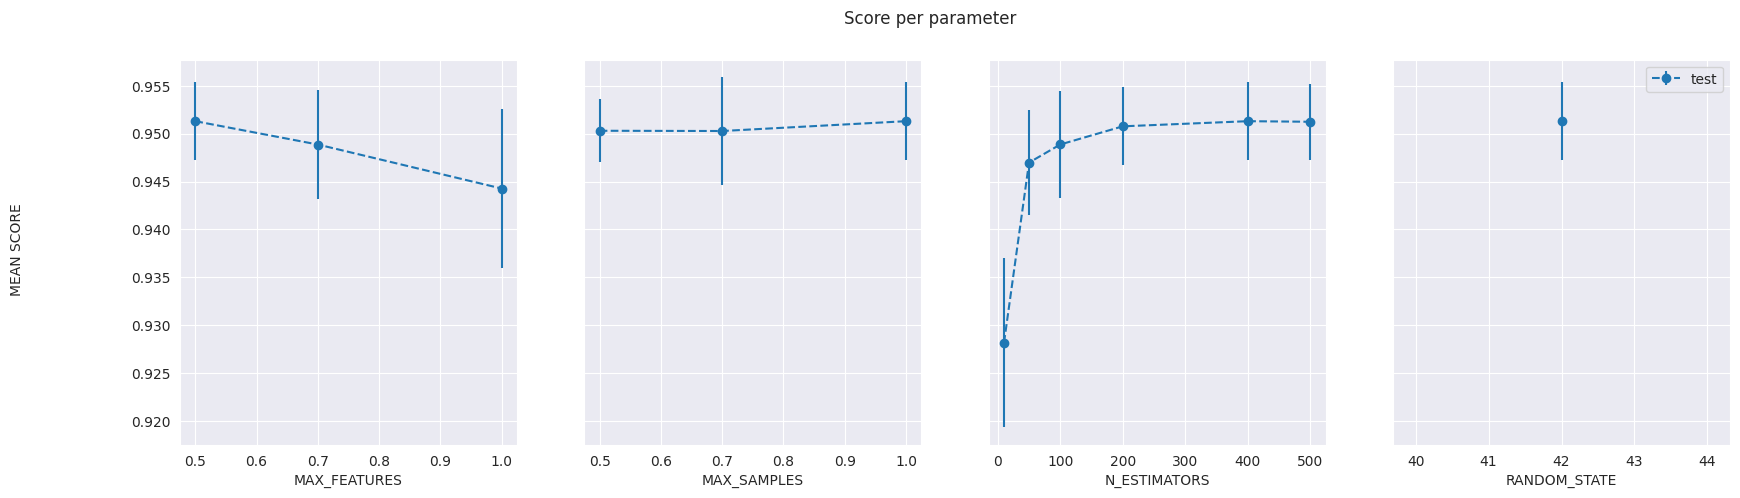

In [153]:
from sklearn.ensemble import BaggingClassifier

grid_search = report_results(train_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"BaggingClassifier", BaggingClassifier(), param_grid = {
    "n_estimators": [10, 50, 100, 200, 400, 500],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "random_state": [42]
})
print(grid_search.best_params_)
plot_search_results(grid_search)

print all results for the assamble methods

In [154]:
pd.DataFrame(classifiers_results).T

,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
RandomForestClassifier_,0.950399,0.900977,0.923096,0.817831,0.889582,0.95518,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=10, max_feat...","{'max_depth': 10, 'min_samples_split': 5, 'n_e...","[marital_status, application_mode, application..."
AdaBoostClassifier_,0.951653,0.906579,0.922123,0.834206,0.89839,0.953762,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=1, random_st...","{'learning_rate': 0.1, 'n_estimators': 600, 'r...","[marital_status, application_mode, application..."
BaggingClassifier_,0.9513,0.904424,0.924474,0.825487,0.893652,0.9559,precision recall f1-score ...,(DecisionTreeClassifier(random_state=195292617...,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...","[marital_status, application_mode, application..."


# Combining everything

In [155]:
def test_algoritms(column_name, columns, train_df):
    report_results(train_df, column_name, columns, "DecisionTree", tree.DecisionTreeClassifier(), {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10, 20, 100, 225, 500, 1000],
    "random_state": [42]
    })

    report_results(train_df,column_name, columns, f"knn", KNeighborsClassifier(), {
    "n_neighbors": [3, 5, 10, 20, 50, 100, 225, 500],
    "weights": ["uniform", "distance"],
    })

    report_results(train_df,column_name, columns, "BernoulliNB", BernoulliNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    })

    report_results(train_df,column_name, columns, "GaussianNB", GaussianNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "var_smoothing": [1e-9]
    })

    report_results(train_df,column_name, columns, f"Random_forest", RandomForestClassifier(), {
    "n_estimators": [100, 200, 400, 500, 600],
    "max_depth": [5, 10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "random_state": [42]
    })

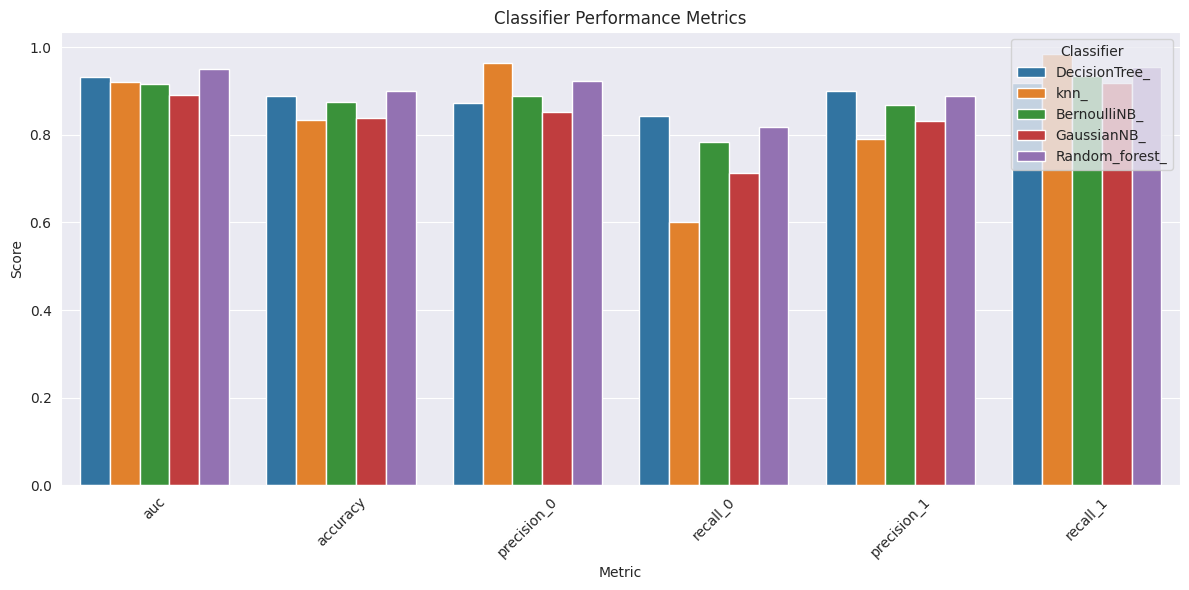

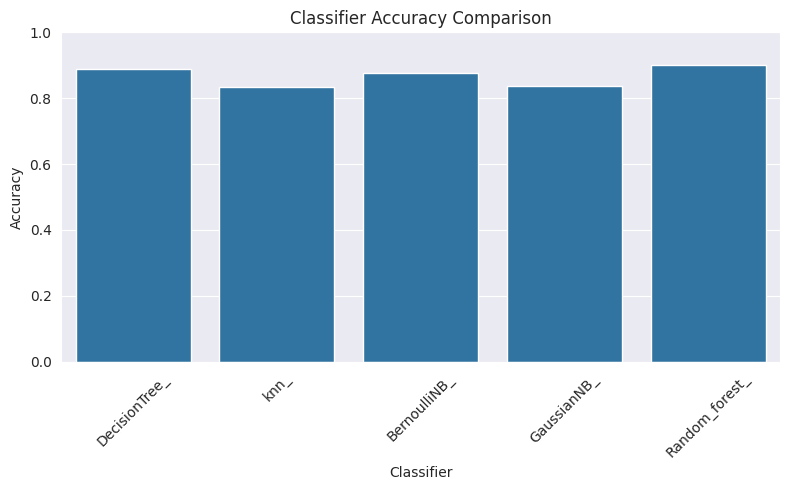

In [156]:
classifiers_results = {}

test_algoritms("", colum_combinations["person_and_economic_and_academic_performance_indicators"], train_df)
results_df = pd.DataFrame(classifiers_results).T

metrics_to_plot = ['auc', 'accuracy', 'precision_0', 'recall_0', 'precision_1', 'recall_1']

# Reshape for seaborn
results_melted = results_df[metrics_to_plot].reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
results_melted.rename(columns={'index': 'Classifier'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Classifier', data=results_melted)
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Classifier')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))

In [162]:
import pickle

classifiers_results = {}

for k in [1, 2, 5,10,15,20,25,30]:
    x = df[colum_combinations["person_and_economic_and_academic_performance_indicators"]]
    y = df[["target"]]
    b_best_features = select_kbest(x, y, k)
    print(f"K: {k} best features: {b_best_features}")
    test_algoritms(f"k_best_features_{k}", b_best_features, train_df)

for column_name, columns in colum_combinations.items():
    test_algoritms(column_name, columns, train_df)

save_file = open('node_book_results', 'ab')
pickle.dump(classifiers_results, save_file)
save_file.close()

pd.DataFrame(classifiers_results).T

K: 1 best features: ['curricular_units_2nd_sem_approved']


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 2 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded']


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 5 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded']


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 10 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded', 'passing_grade_1st_sem', 'tuition_fees_up_to_date', 'scholarship_holder', 'debtor', 'age_at_enrollment']


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 15 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded', 'passing_grade_1st_sem', 'tuition_fees_up_to_date', 'scholarship_holder', 'debtor', 'age_at_enrollment', 'gender', 'application_mode', 'curricular_units_2nd_sem_enrolled', 'curricular_units_1st_sem_enrolled', 'displaced']


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 20 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded', 'passing_grade_1st_sem', 'tuition_fees_up_to_date', 'scholarship_holder', 'debtor', 'age_at_enrollment', 'gender', 'application_mode', 'curricular_units_2nd_sem_enrolled', 'curricular_units_1st_sem_enrolled', 'displaced', 'curricular_units_2nd_sem_evaluations', 'application_order', 'previous_qualification', 'marital_status', 'curricular_units_2nd_sem_without_evaluations']


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 25 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded', 'passing_grade_1st_sem', 'tuition_fees_up_to_date', 'scholarship_holder', 'debtor', 'age_at_enrollment', 'gender', 'application_mode', 'curricular_units_2nd_sem_enrolled', 'curricular_units_1st_sem_enrolled', 'displaced', 'curricular_units_2nd_sem_evaluations', 'application_order', 'previous_qualification', 'marital_status', 'curricular_units_2nd_sem_without_evaluations', 'attendance_type', 'father_occupation', 'curricular_units_1st_sem_without_evaluations', 'mother_occupation', 'curricular_units_1st_sem_evaluations']


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 30 best features: ['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded', 'passing_grade_1st_sem', 'tuition_fees_up_to_date', 'scholarship_holder', 'debtor', 'age_at_enrollment', 'gender', 'application_mode', 'curricular_units_2nd_sem_enrolled', 'curricular_units_1st_sem_enrolled', 'displaced', 'curricular_units_2nd_sem_evaluations', 'application_order', 'previous_qualification', 'marital_status', 'curricular_units_2nd_sem_without_evaluations', 'attendance_type', 'father_occupation', 'curricular_units_1st_sem_without_evaluations', 'mother_occupation', 'curricular_units_1st_sem_evaluations', 'gdp', 'mother_qualification', 'curricular_units_2nd_sem_credited', 'curricular_units_1st_sem_credited', 'inflation_rate']


In [165]:
if classifiers_results is not None:
    save_file = open('node_book_results', 'rb')
    classifiers_results = pickle.load(save_file)
    save_file.close()

pd.DataFrame(classifiers_results).T

,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
DecisionTree_k_best_features_1,0.902661,0.867835,0.909926,0.738245,0.848012,0.952346,precision recall f1-score ...,"DecisionTreeClassifier(max_depth=10, random_st...","{'max_depth': 10, 'min_samples_split': 2, 'ran...",[curricular_units_2nd_sem_approved]
knn_k_best_features_1,0.905621,0.867835,0.909926,0.738245,0.848012,0.952346,precision recall f1-score ...,"KNeighborsClassifier(n_neighbors=100, weights=...","{'n_neighbors': 100, 'weights': 'distance'}",[curricular_units_2nd_sem_approved]
BernoulliNB_k_best_features_1,0.853642,0.860945,0.827179,0.818959,0.882688,0.888324,precision recall f1-score ...,BernoulliNB(alpha=1),{'alpha': 1},[curricular_units_2nd_sem_approved]
GaussianNB_k_best_features_1,0.891463,0.867835,0.909926,0.738245,0.848012,0.952346,precision recall f1-score ...,GaussianNB(),{'var_smoothing': 1e-09},[curricular_units_2nd_sem_approved]
Random_forest_k_best_features_1,0.903729,0.867835,0.909926,0.738245,0.848012,0.952346,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=10, max_feat...","{'max_depth': 10, 'min_samples_split': 2, 'n_e...",[curricular_units_2nd_sem_approved]
DecisionTree_k_best_features_2,0.904687,0.866973,0.906372,0.739332,0.848268,0.950211,precision recall f1-score ...,"DecisionTreeClassifier(max_depth=5, min_sample...","{'max_depth': 5, 'min_samples_split': 225, 'ra...","[curricular_units_2nd_sem_approved, curricular..."
knn_k_best_features_2,0.904705,0.865684,0.873335,0.772024,0.862006,0.926736,precision recall f1-score ...,KNeighborsClassifier(n_neighbors=50),"{'n_neighbors': 50, 'weights': 'uniform'}","[curricular_units_2nd_sem_approved, curricular..."
BernoulliNB_k_best_features_2,0.873096,0.860516,0.822082,0.825505,0.885874,0.88335,precision recall f1-score ...,BernoulliNB(alpha=1),{'alpha': 1},"[curricular_units_2nd_sem_approved, curricular..."
GaussianNB_k_best_features_2,0.895854,0.823934,0.923771,0.604164,0.789351,0.967277,precision recall f1-score ...,GaussianNB(),{'var_smoothing': 1e-09},"[curricular_units_2nd_sem_approved, curricular..."
Random_forest_k_best_features_2,0.904009,0.864391,0.883828,0.75566,0.854619,0.935282,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=5, max_featu...","{'max_depth': 5, 'min_samples_split': 10, 'n_e...","[curricular_units_2nd_sem_approved, curricular..."


## plot and get results of best combinations per model

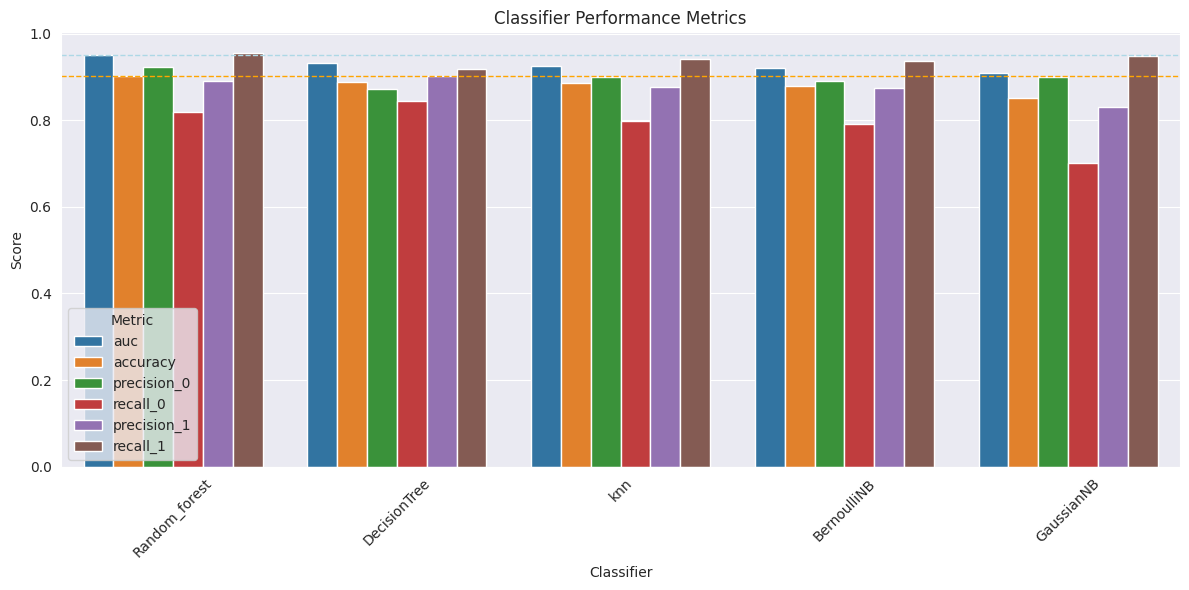

,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
Random_forest,0.950399,0.900977,0.923096,0.817831,0.889582,0.95518,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=10, max_feat...","{'max_depth': 10, 'min_samples_split': 5, 'n_e...","[marital_status, application_mode, application..."
DecisionTree,0.932604,0.889359,0.873224,0.844007,0.901033,0.918902,precision recall f1-score ...,"DecisionTreeClassifier(max_depth=20, min_sampl...","{'max_depth': 20, 'min_samples_split': 100, 'r...","[marital_status, application_mode, application..."
knn,0.925722,0.885484,0.900488,0.798188,0.877811,0.942384,precision recall f1-score ...,KNeighborsClassifier(n_neighbors=20),"{'n_neighbors': 20, 'weights': 'uniform'}","[curricular_units_2nd_sem_approved, curricular..."
BernoulliNB,0.921359,0.879027,0.889921,0.791679,0.873325,0.935976,precision recall f1-score ...,BernoulliNB(alpha=1),{'alpha': 1},"[curricular_units_2nd_sem_approved, curricular..."
GaussianNB,0.908422,0.85062,0.899344,0.700077,0.829434,0.948782,precision recall f1-score ...,GaussianNB(),{'var_smoothing': 1e-09},"[curricular_units_2nd_sem_approved, curricular..."


In [192]:
models = ["Random_forest", "DecisionTree", "knn", "BernoulliNB", "GaussianNB"]
best_classifiers_results = {}
for key, value in classifiers_results.items():
    for model in models:
        if model not in best_classifiers_results.keys():
            best_classifiers_results[model] = value
        if key.startswith(model) and value["auc"] > best_classifiers_results[model]["auc"]:
            best_classifiers_results[model] = value

metrics_to_plot = ['auc', 'accuracy', 'precision_0', 'recall_0', 'precision_1', 'recall_1']

best_result_df = pd.DataFrame(best_classifiers_results).T

# Reshape for seaborn
results_melted = best_result_df[metrics_to_plot].reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
results_melted.rename(columns={'index': 'Classifier'}, inplace=True)

# Plot

plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Score', hue='Metric', data=results_melted)
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

max_auc = best_result_df['auc'].max()
plt.axhline(y=max_auc, color='lightblue', linestyle='--', linewidth=1, label=f'Max AUC = {max_auc:.2f}')

max_accuracy = best_result_df['accuracy'].max()
plt.axhline(y=max_accuracy, color='orange', linestyle='--', linewidth=1, label=f'Max AUC = {max_auc:.2f}')
plt.savefig("images/best_results.png")
plt.show()

best_result_df

### Impact removing bais items

['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded', 'passing_grade_1st_sem', 'tuition_fees_up_to_date', 'scholarship_holder', 'debtor', 'age_at_enrollment', 'gender', 'application_mode', 'curricular_units_2nd_sem_enrolled', 'curricular_units_1st_sem_enrolled', 'displaced']
['curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade_rounded', 'passing_grade_1st_sem', 'tuition_fees_up_to_date', 'scholarship_holder', 'debtor', 'age_at_enrollment', 'application_mode', 'curricular_units_2nd_sem_enrolled', 'curricular_units_1st_sem_enrolled', 'displaced']


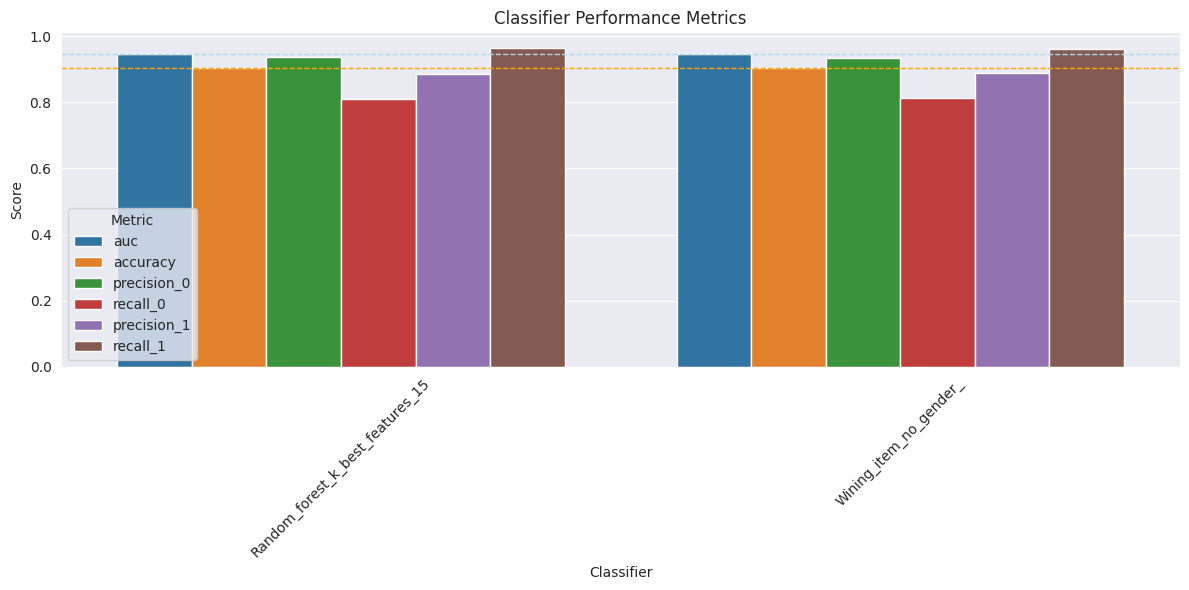

,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
Random_forest_k_best_features_15,0.9455,0.903565,0.935985,0.811303,0.886953,0.963721,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=10, max_feat...","{'max_depth': 10, 'min_samples_split': 10, 'n_...","[curricular_units_2nd_sem_approved, curricular..."
Wining_item_no_gender_,0.945775,0.903565,0.934048,0.813477,0.888036,0.962298,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=10, max_feat...","{'max_depth': 10, 'min_samples_split': 10, 'n_...","[curricular_units_2nd_sem_approved, curricular..."


In [222]:
best_model = ""

if classifiers_results is None:
    save_file = open('node_book_results', 'rb')
    classifiers_results = pickle.load(save_file)
    save_file.close()


parameters = classifiers_results["Random_forest_k_best_features_15"]["best_params"]
print(classifiers_results["Random_forest_k_best_features_15"]["column_items"])
columns = classifiers_results["Random_forest_k_best_features_15"]["column_items"]
columns.remove("gender")

print(columns)

parameters = {key: [value] for key, value in parameters.items()}

report_results(train_df, "", columns, "Wining_item_no_gender", RandomForestClassifier(), parameters)

save_file = open('node_book_results', 'ab')
pickle.dump(classifiers_results, save_file)
save_file.close()

results_df = pd.DataFrame(classifiers_results).T
compare_two_results = results_df.loc[results_df.index.isin(['Random_forest_k_best_features_15', 'Wining_item_no_gender_'])]

results_melted = compare_two_results[metrics_to_plot].reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
results_melted.rename(columns={'index': 'Classifier'}, inplace=True)

# Plot

plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Score', hue='Metric', data=results_melted)
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

max_auc = compare_two_results['auc'].max()
plt.axhline(y=max_auc, color='lightblue', linestyle='--', linewidth=1, label=f'Max AUC = {max_auc:.2f}')

max_accuracy = compare_two_results['accuracy'].max()
plt.axhline(y=max_accuracy, color='orange', linestyle='--', linewidth=1, label=f'Max AUC = {max_auc:.2f}')
plt.savefig("images/compare_with_without_gender.png")
plt.show()
compare_two_results

## Use test

In [225]:
import pickle

best_model = ""

if classifiers_results is None:
    save_file = open('node_book_results', 'rb')
    classifiers_results = pickle.load(save_file)
    save_file.close()


parameters = classifiers_results["Wining_item_no_gender_"]["best_params"]
columns = classifiers_results["Wining_item_no_gender_"]["column_items"]

parameters = {key: [value] for key, value in parameters.items()}

results_with_test_data(train_df, test_df, "", columns, "Run_test", RandomForestClassifier(), parameters)

save_file = open('node_book_results', 'ab')
pickle.dump(classifiers_results, save_file)
save_file.close()

pd.DataFrame([classifiers_results["Run_test_"]]).T

,0
auc,0.888315
accuracy,0.905336
precision_0,0.923077
recall_0,0.818182
precision_1,0.896373
recall_1,0.958449
report,precision recall f1-score ...
best_model,"(DecisionTreeClassifier(max_depth=10, max_feat..."
best_params,"{'max_depth': 10, 'min_samples_split': 10, 'n_..."
column_items,"[curricular_units_2nd_sem_approved, curricular..."


## Fill the Graduation dataset

In [72]:
if classifiers_results is None or "Wining_item_" not in classifiers_results:
    save_file = open('node_book_results', 'rb')
    classifiers_results = pickle.load(save_file)
    save_file.close()

model = classifiers_results["Wining_item_"]["best_model"]

graduation_test_df["graduation_prediction"] = model.predict(graduation_test_df[classifiers_results["Wining_item_"]["column_items"]])

predictions_template = pd.read_csv("predictions_template.csv")
combined = pd.merge(graduation_test_df, predictions_template.drop(columns=["graduation_prediction"]), on=['student_id', 'student_id'], how='inner')
print(combined)
combined[["student_id","graduation_prediction"]].to_csv('filled_in.csv', index=False)

     student_id  marital_status  application_mode  application_order  course  \
0          2905               1                14                  1       9   
1          2906               1                17                  1      11   
2          2907               1                14                  1      12   
3          2908               1                 1                  5      12   
4          2909               1                 1                  2      13   
..          ...             ...               ...                ...     ...   
721        3626               1                 1                  1      10   
722        3627               1                 1                  1       5   
723        3628               1                12                  1      12   
724        3629               3                12                  1      17   
725        3630               1                14                  1       9   

     attendance_type  previous_qualific